# Fine-tune YOLOv8 on Unity Synthetic Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!mkdir data
!unzip /content/drive/MyDrive/datasets/dataset.zip -d data

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.6/78.2 GB disk)


## Train the model

In [ ]:
!yolo mode=train task=detect model=yolov8m.pt data=/content/data/data.yaml epochs=100 imgsz=800 plots=True

100% 49.7M/49.7M [00:00<00:00, 170MB/s]
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

## Statistics

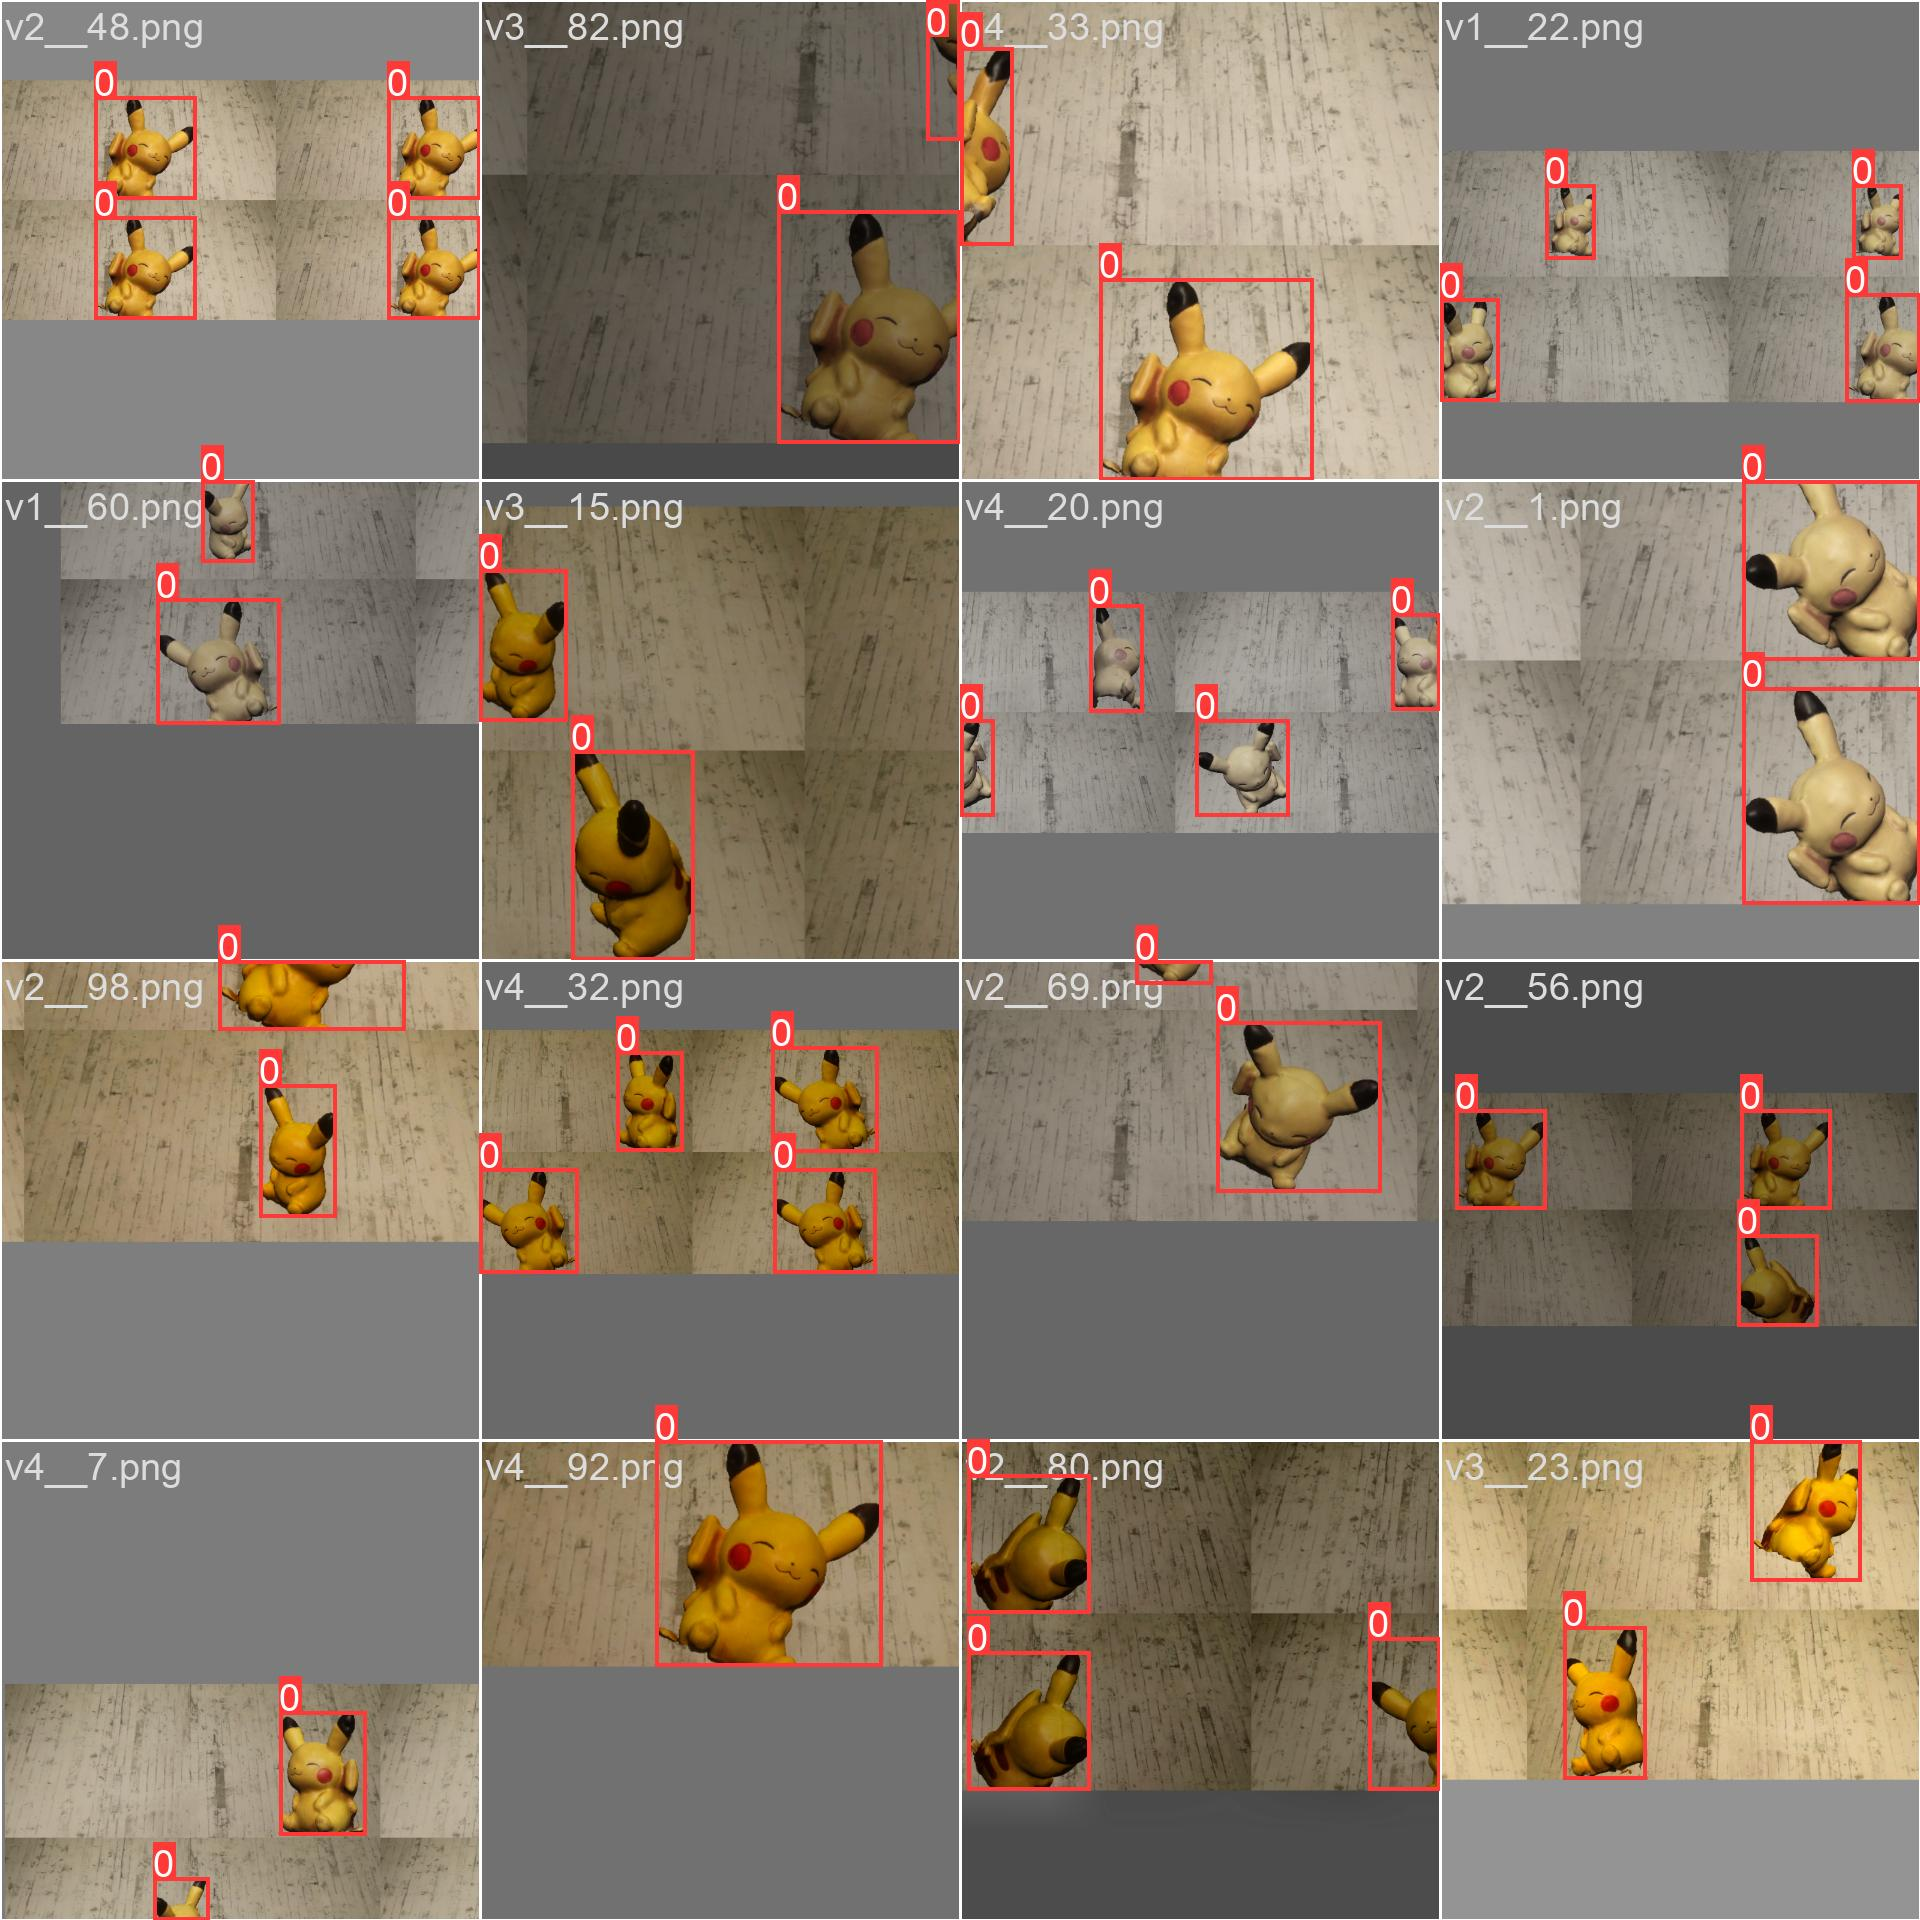

In [ ]:
from IPython.display import display, Image

Image(filename='/content/runs/detect/train/train_batch0.jpg', width=600)

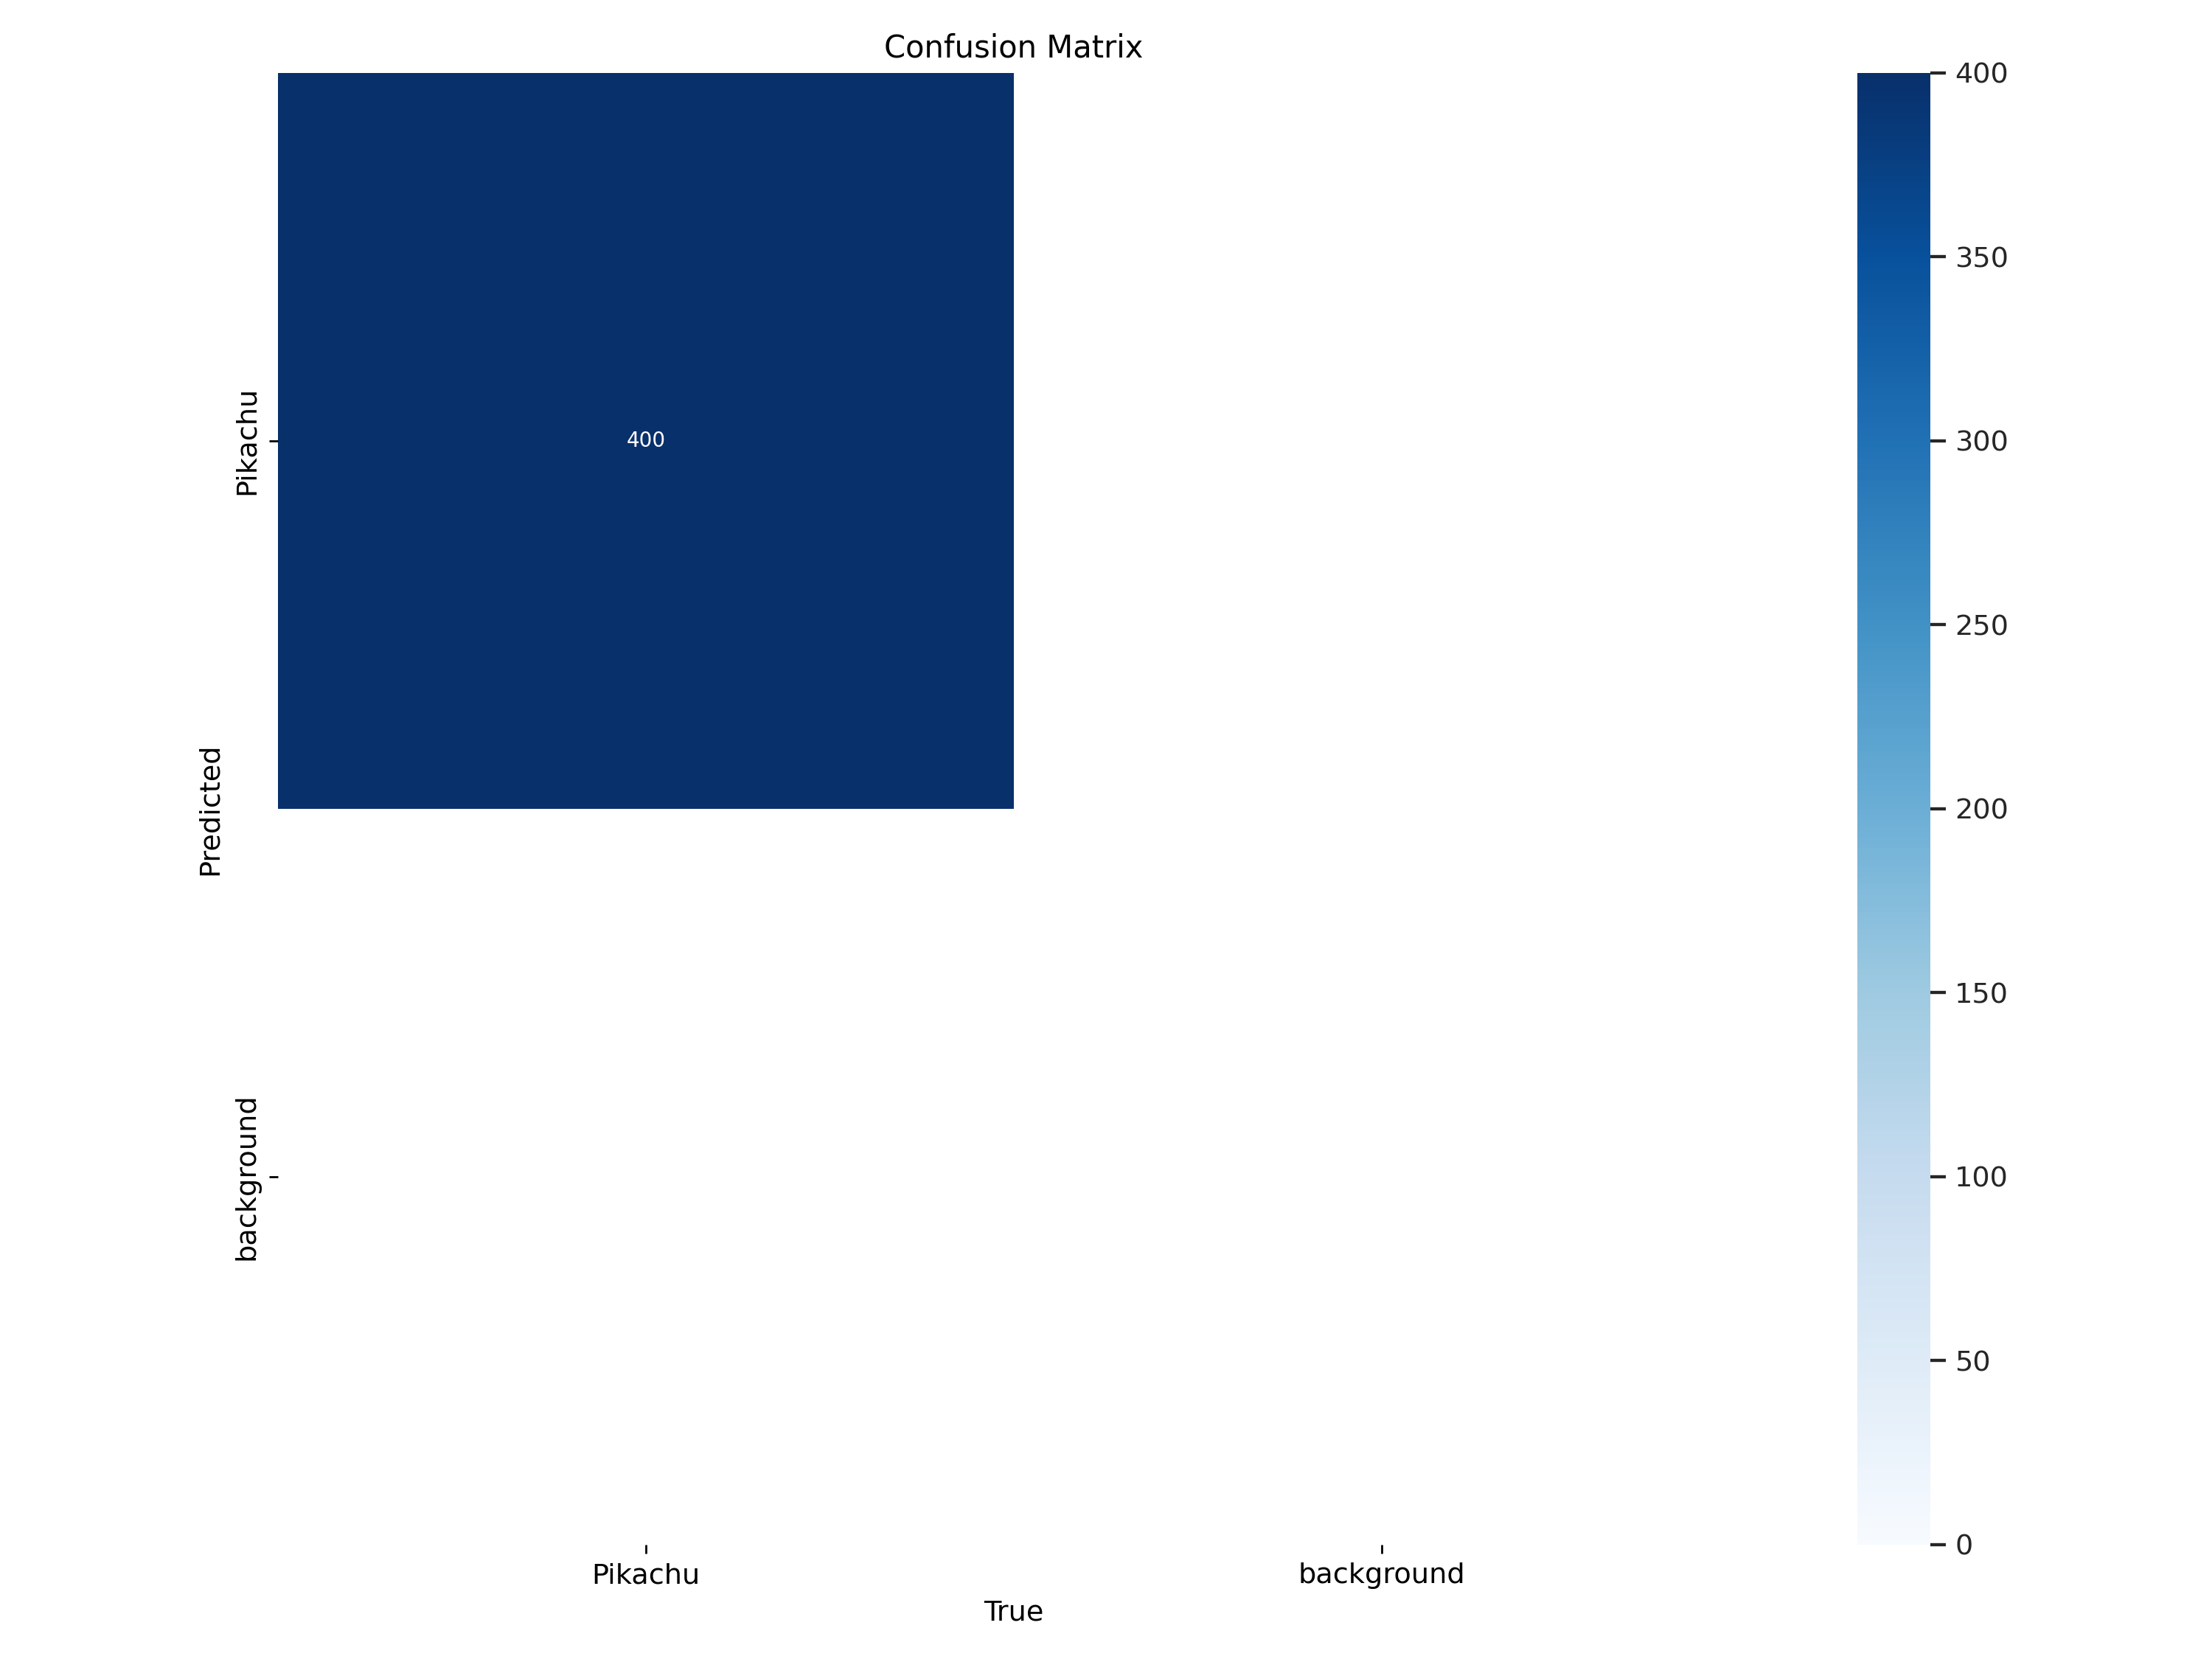

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

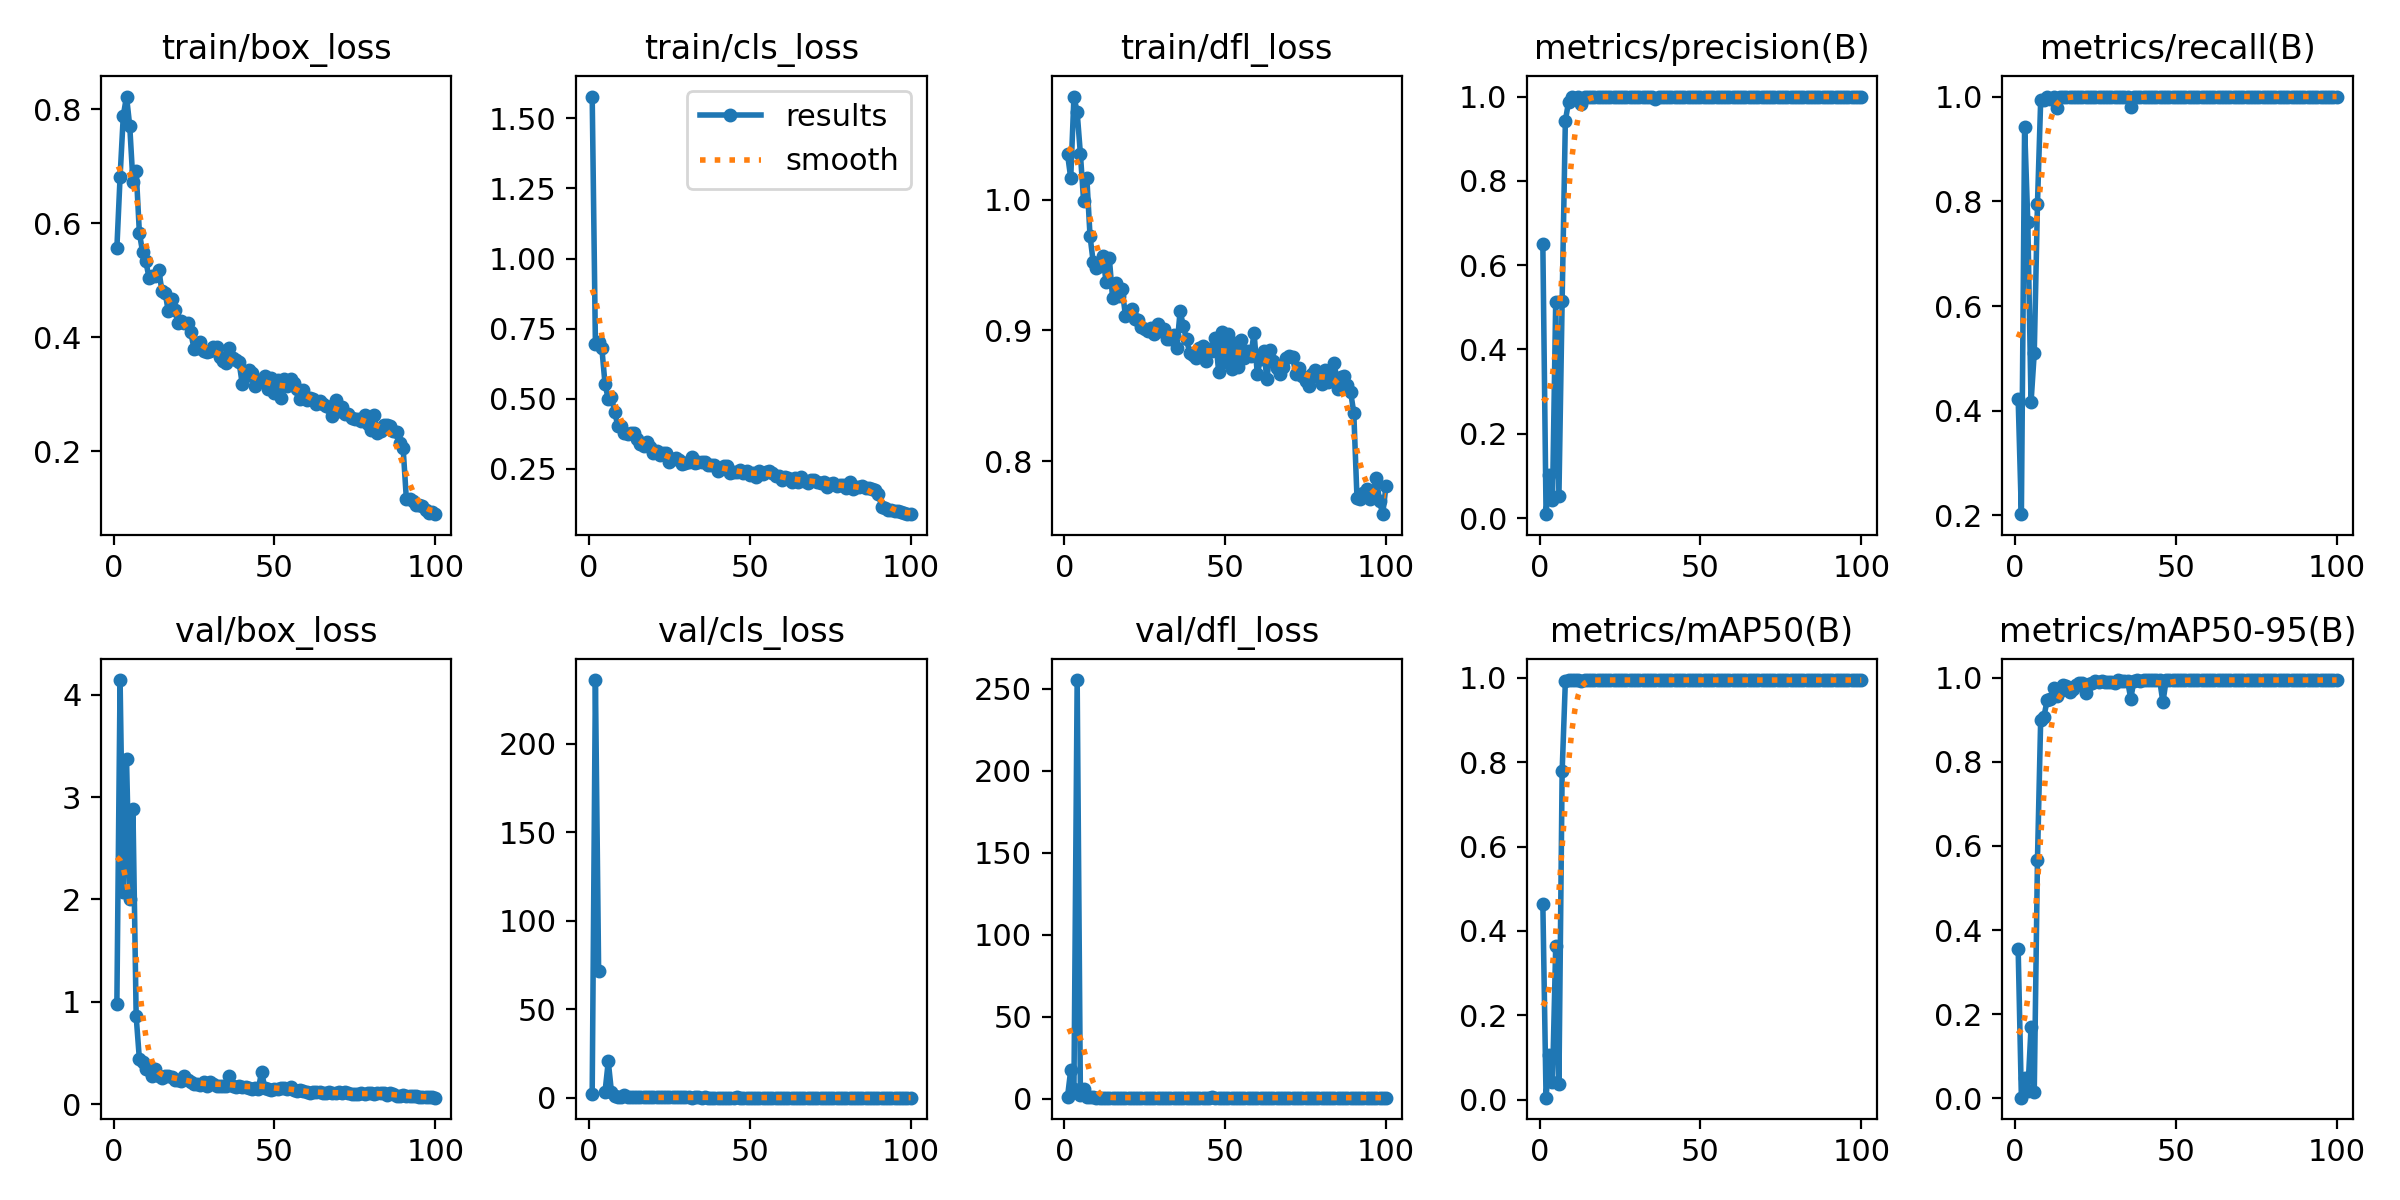

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

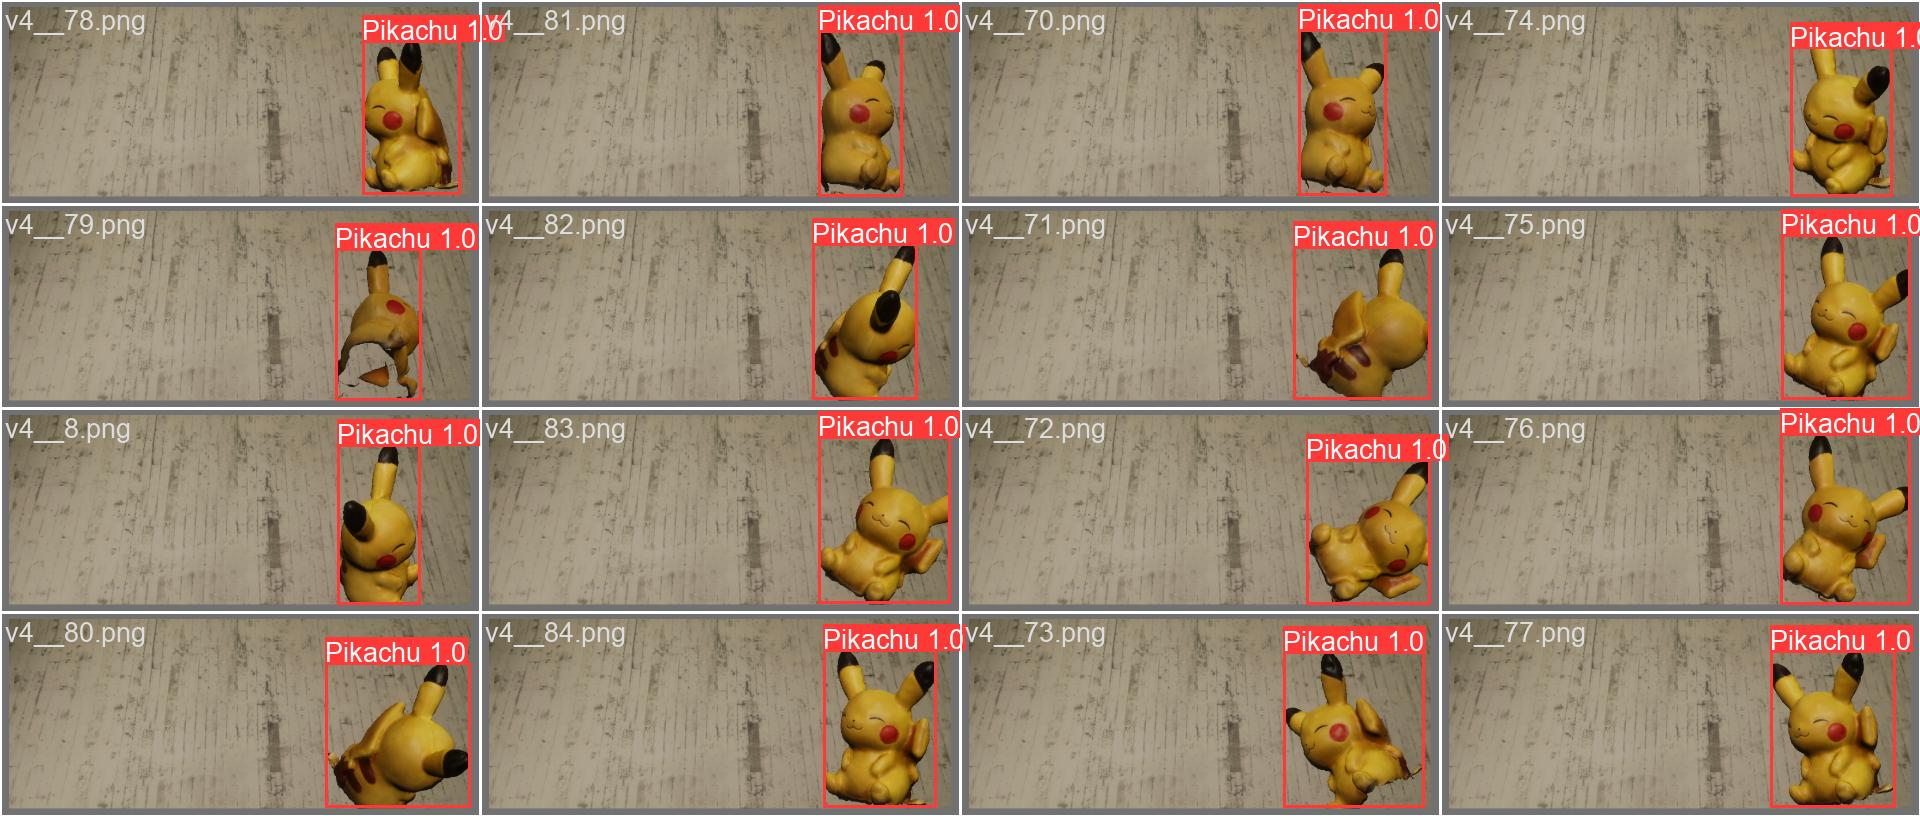

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

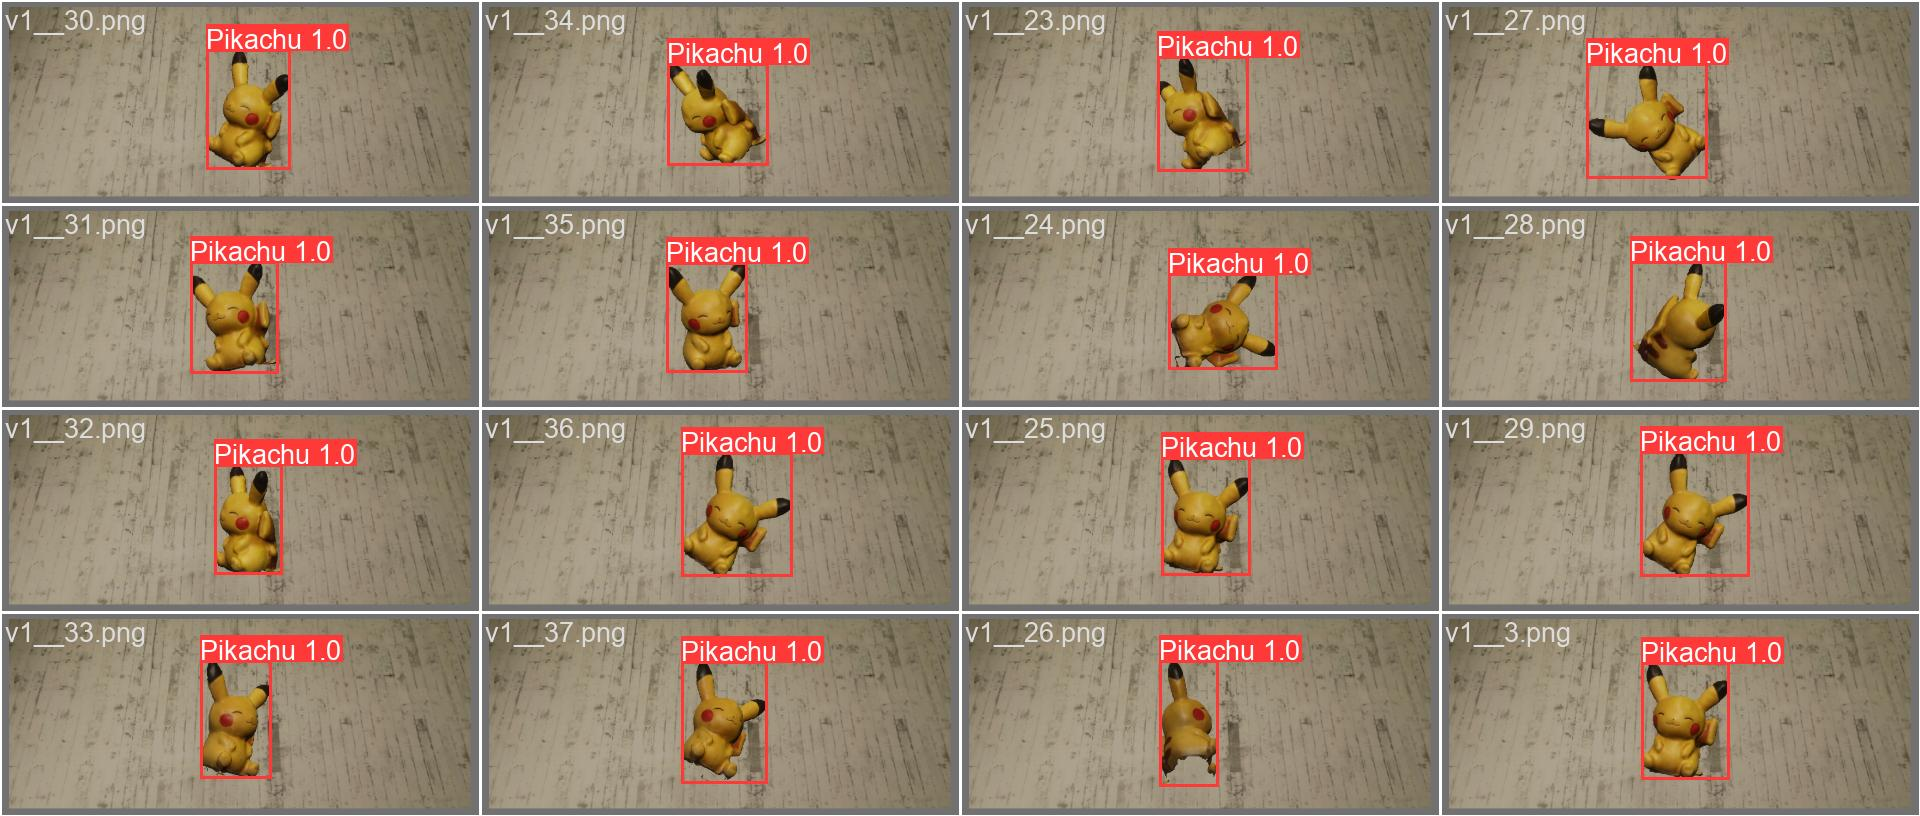

In [ ]:
Image(filename='/content/runs/detect/train/val_batch1_pred.jpg', width=600)

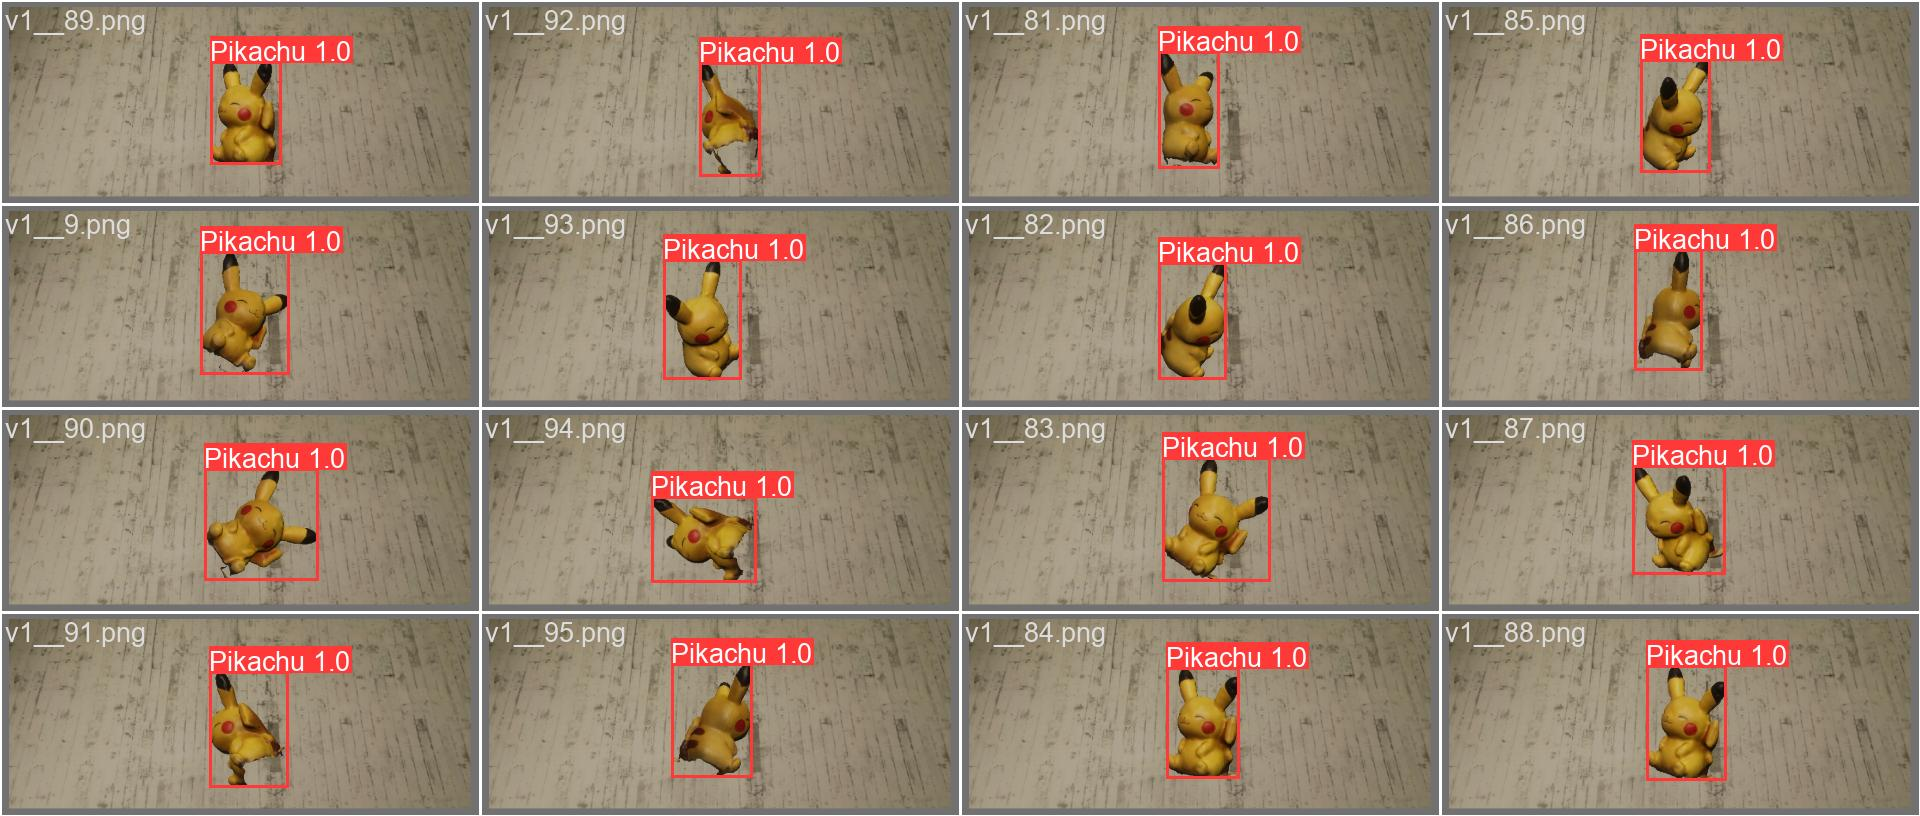

In [ ]:
Image(filename='/content/runs/detect/train/val_batch2_pred.jpg', width=600)

## Prediction

In [ ]:
!yolo mode=predict task=detect model=/content/runs/detect/train/weights/best.pt source=/content/test save=True conf=0.25

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/3 /content/test/00.jpg: 544x800 1 Pikachu, 164.4ms
image 2/3 /content/test/01.jpg: 544x800 1 Pikachu, 42.3ms
image 3/3 /content/test/02.jpg: 544x800 1 Pikachu, 42.0ms
Speed: 6.8ms preprocess, 82.9ms inference, 312.9ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


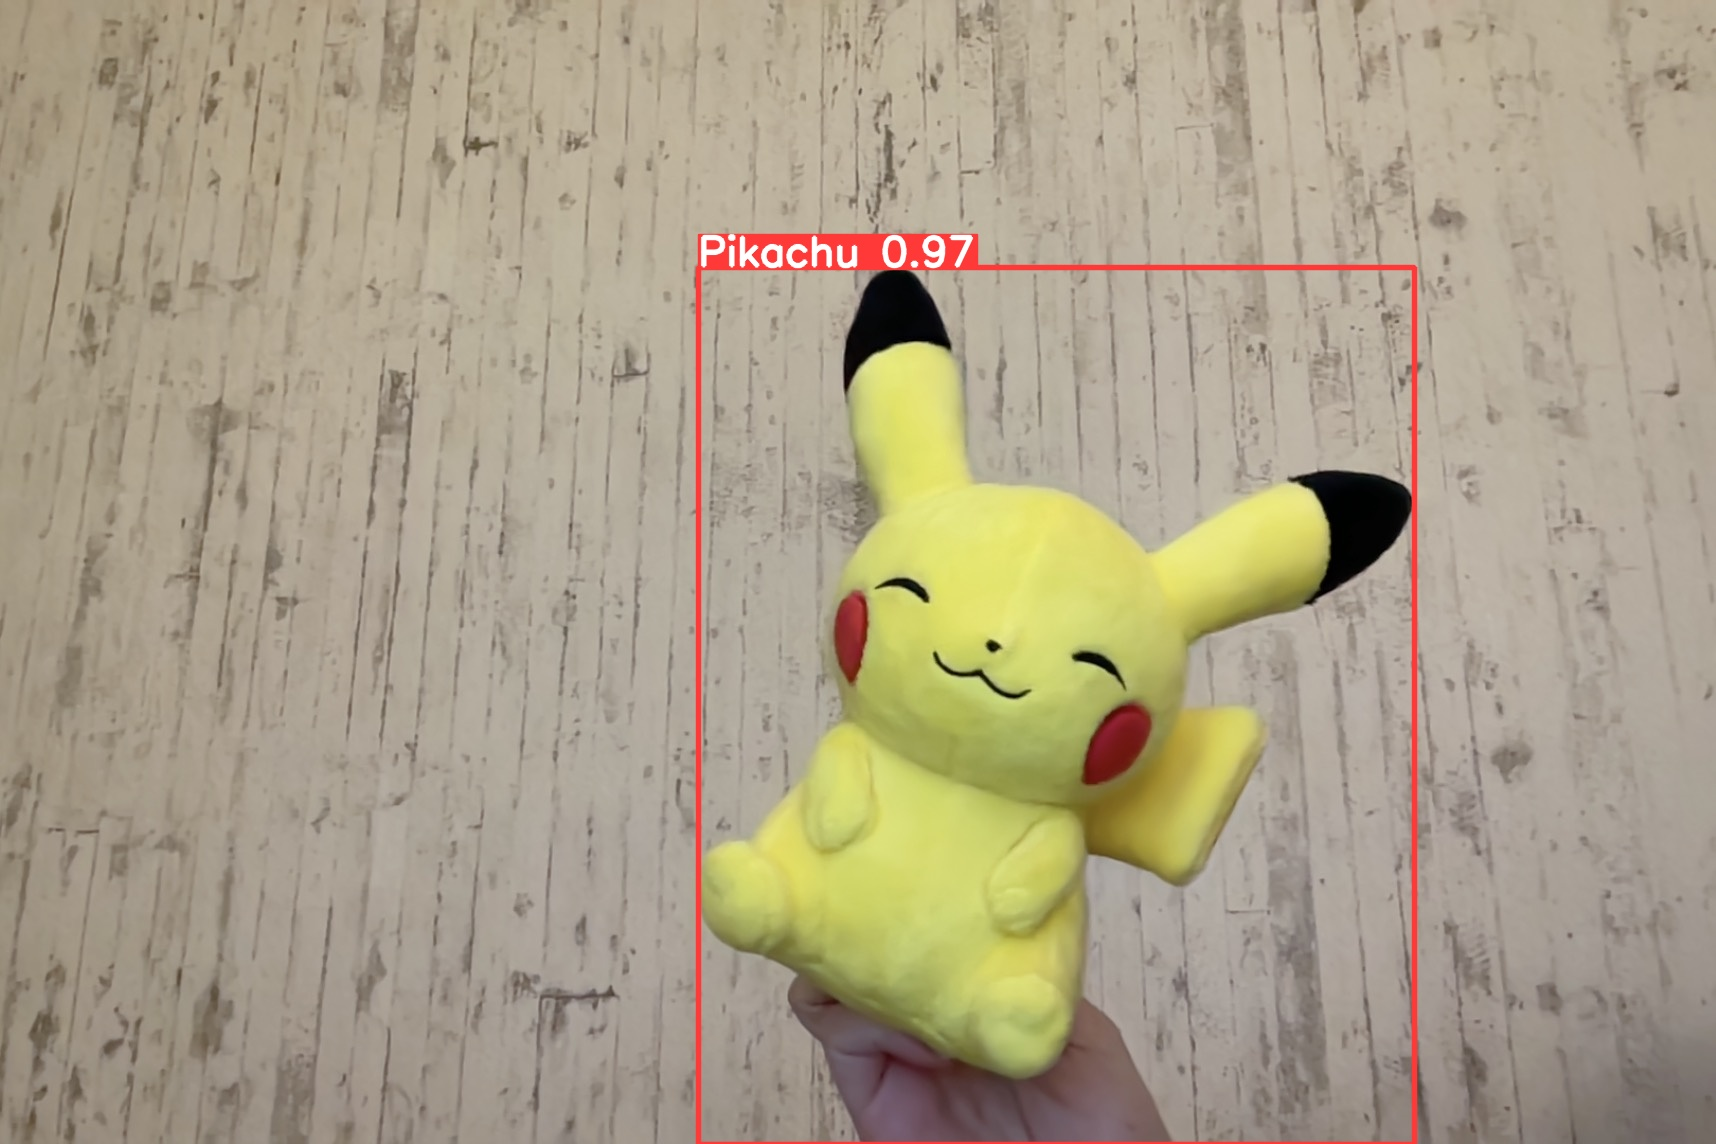

In [ ]:
Image(filename='/content/runs/detect/predict/00.jpg', width=600)

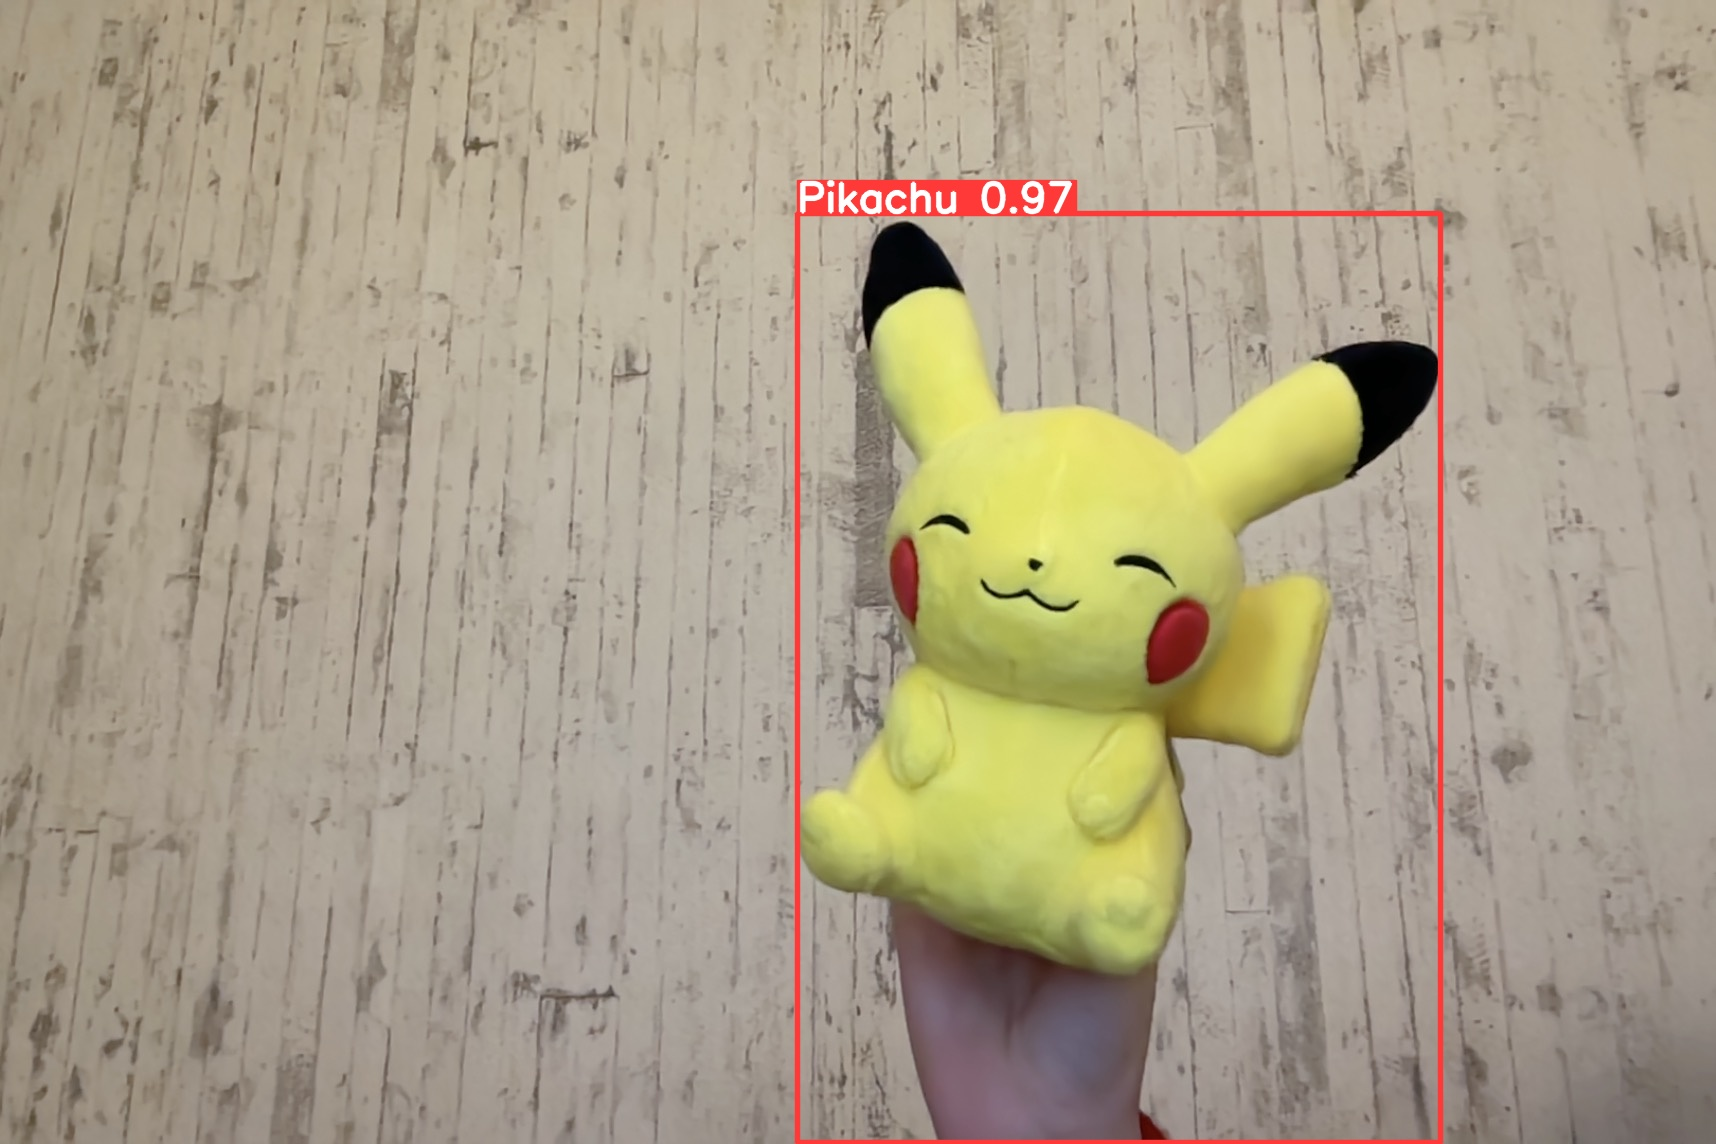

In [ ]:
Image(filename='/content/runs/detect/predict/01.jpg', width=600)

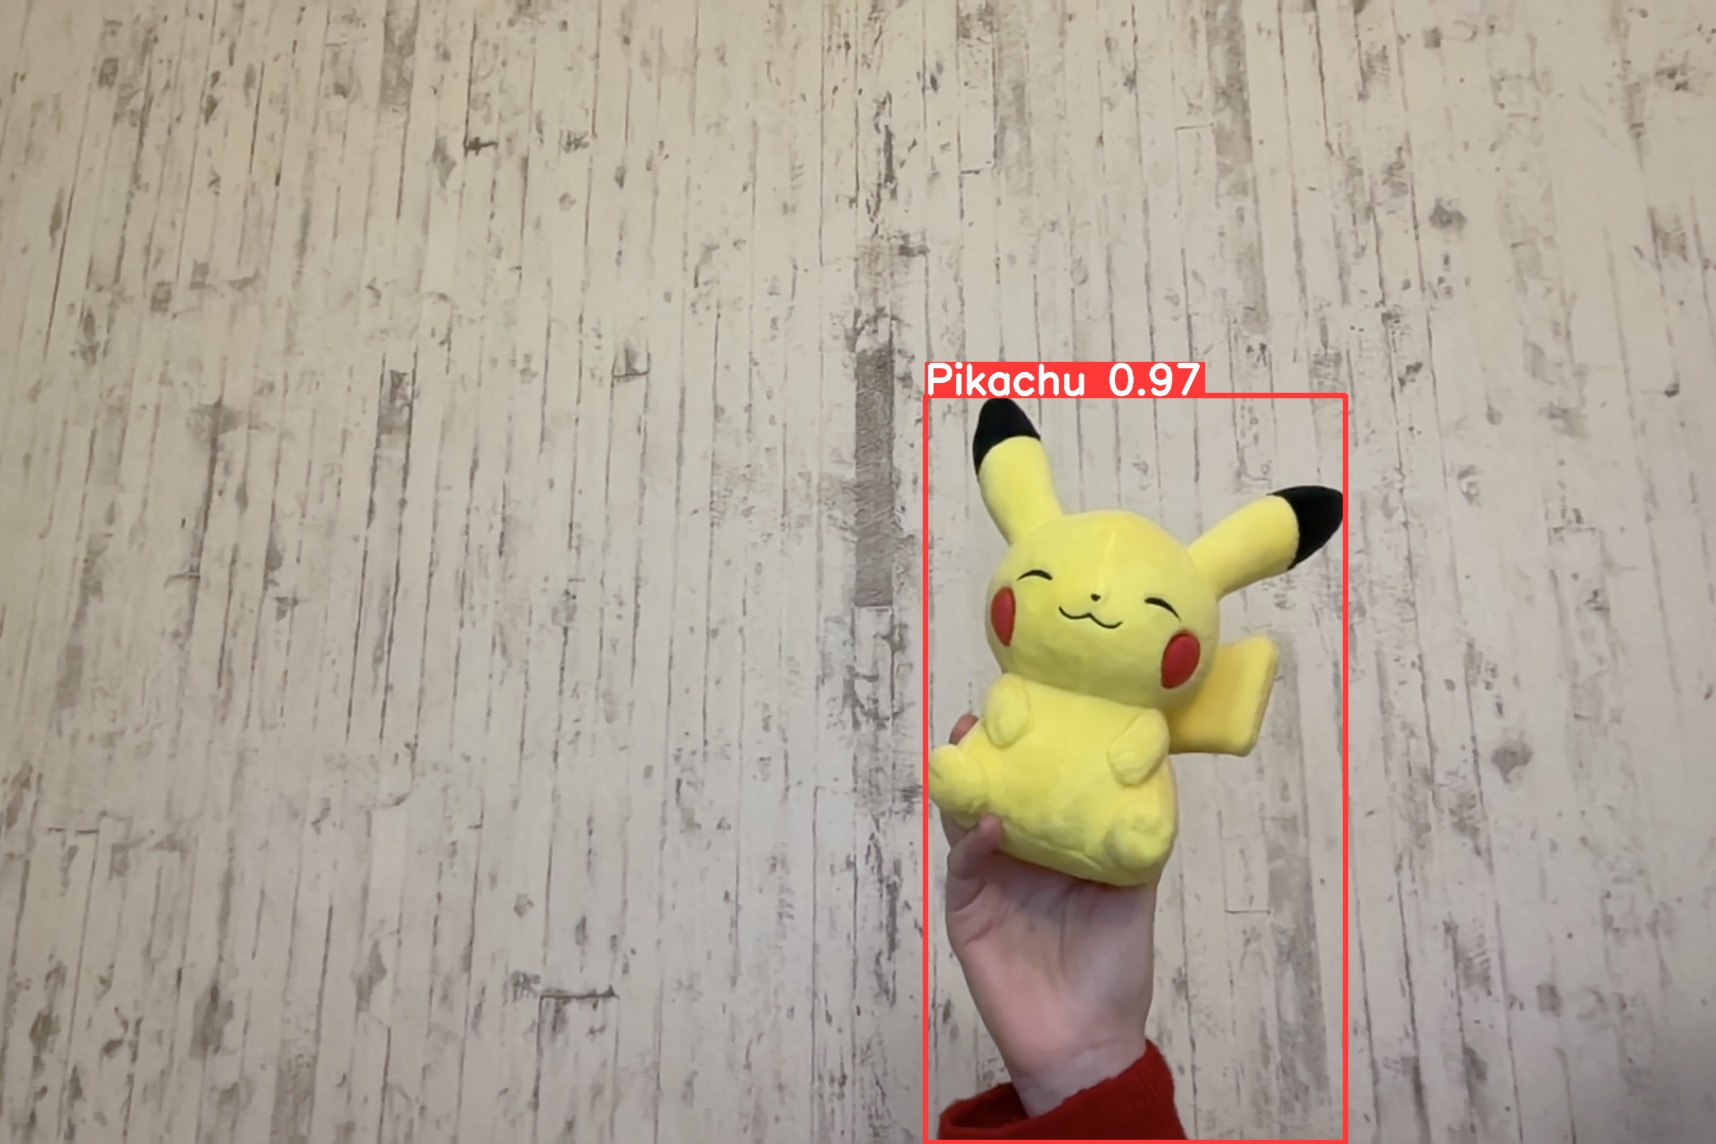

In [ ]:
Image(filename='/content/runs/detect/predict/02.jpg', width=600)